In this part of code 3 charts can be found.
The first one is a Word Cloud showing most common words in the series' titles.
Another one is a pie chart demonstrating the distribution of phrases said.
Tha last one illustrates the correlation between the amount of monsters in a serie and mean rating.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-13/scoobydoo.csv'
data_df = pd.read_csv(data_url)
data_df

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Scooby-Doo and Guess Who?,Boomerang,2,The Dreaded Remake of Jekyll & Hyde!,NaN,NaN,2020-10-01,22,TV Series,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
599,600,Warner Home Video,Warner Home Video,Movie,"Happy Halloween, Scooby-Doo!",6.3,978.0,2020-10-06,76,Movie,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
600,601,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! The Sword and the Scoob,6.2,422.0,2020-02-23,77,Movie,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
601,602,Scooby-Doo and Guess Who?,Boomerang,2,Dark Diner of Route 66!,NaN,NaN,2021-02-25,22,TV Series,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker


## Word Cloud

In [3]:
li = list(data_df["title"])
li

['What a Night for a Knight',
 'A Clue for Scooby Doo',
 'Hassle in the Castle',
 'Mine Your Own Business',
 'Decoy for a Dognapper',
 'What the Hex Going On?',
 'Never Ape an Ape Man',
 'Foul Play in Funland',
 'The Backstage Rage',
 'Bedlam in the Big Top',
 'A Gaggle of Galloping Ghosts',
 'Scooby-Doo and a Mummy, Too',
 'Which Witch is Which',
 'Go Away Ghost Ship',
 'Spooky Space Kook',
 'A Night of Fright Is No Delight',
 "That's Snow Ghost",
 'Nowhere to Hyde',
 'Mystery Mask Mix-Up',
 "Scooby's Night with a Frozen Fright",
 "Jeepers, It's the Creeper",
 'Haunted House Hang-Up',
 'A Tiki Scare Is No Fair',
 "Who's Afraid of the Big Bad Werewolf?",
 "Don't Fool with a Phantom",
 'The Ghastly Ghost Town',
 'The Dynamic Scooby-Doo Affair',
 'Wednesday Is Missing',
 'The Frickert Fracas',
 "Guess Who's Knott Coming to Dinner?",
 'A Good Medium Is Rare',
 "Sandy Duncan's Jekyll and Hyde",
 'The Secret of Shark Island',
 'The Spooky Fog of Juneberry',
 'The Ghost of Bigfoot',
 'The Gh

In [4]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()

import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

In [5]:
def lemmatize(x): 
    if type(x) != str: 
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [6]:
text = " ".join(data_df["title"].apply(lemmatize).values)

In [7]:
text

'night knight clue scooby doo hassle castle mine business decoy dognapper hex going never ape ape man foul play funland backstage rage bedlam big top gaggle galloping ghosts scooby doo mummy witch go away ghost ship spooky space kook night fright delight snow ghost nowhere hyde mystery mask mix scooby night frozen fright jeepers creeper haunted house hang tiki scare fair afraid big bad werewolf fool phantom ghastly ghost town dynamic scooby doo affair wednesday missing frickert fracas guess knott coming dinner good medium rare sandy duncan jekyll hyde secret shark island spooky fog juneberry ghost bigfoot ghost red baron ghostly creep deep haunted horseman hagglethorn hall phantom country music hall caped crusader caper lochness mess mystery haunted island haunted showboat mystery persia spirited spooked sports show exterminator weird winds winona haunted candy factory haunted carnival high rise hair raiser everyone hyde fiesta host aztec ghost lowbrow gruesome game gator ghoul whatta 

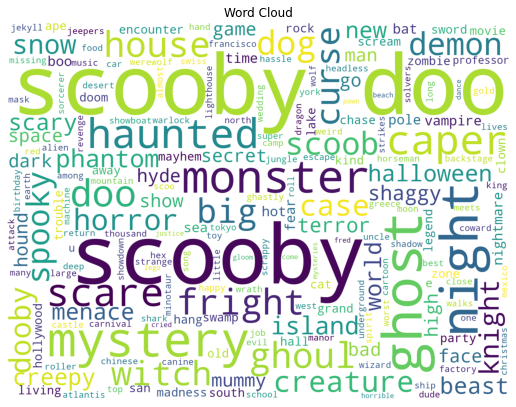

In [122]:
wordcloud = WordCloud(
    background_color ='white',
    width = 1600,
    height = 1200, 
).generate(text) # создание облака слов

plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title("Word Cloud")
plt.show()

## Pie Chart

In [59]:
list(df_phrases["phrase"])

['jeepers',
 'jinkies',
 'my_glasses',
 'just_about_wrapped_up',
 'zoinks',
 'groovy',
 'scooby_doo_where_are_you',
 'rooby_rooby_roo']

In [60]:
def phrases_count1(data_frame, column_name):
    return int(data_frame[column_name].sum())

In [61]:
li_phrases = [
    "jeepers", "jinkies", "my_glasses", "just_about_wrapped_up", 
    "zoinks", "groovy", "scooby_doo_where_are_you", "rooby_rooby_roo"
]

li_phrases_number1 = []
for phrase in li_phrases:
    li_phrases_number1.append(phrases_count1(data_df, phrase))

In [62]:
df_phrase = pd.DataFrame({'number_of_times_phrase_said': li_phrases_number1},
                  index=li_phrases)
df_phrase

,number_of_times_phrase_said
jeepers,247
jinkies,503
my_glasses,45
just_about_wrapped_up,20
zoinks,1229
groovy,34
scooby_doo_where_are_you,76
rooby_rooby_roo,413


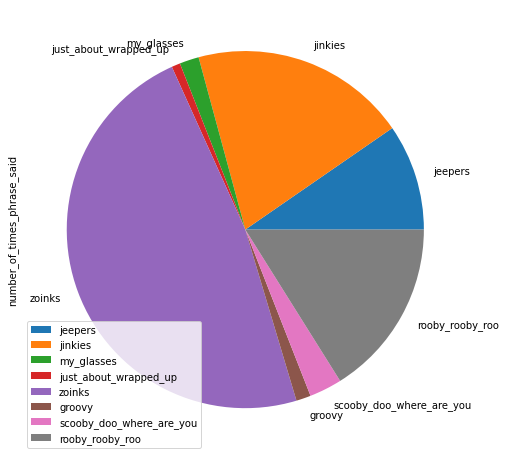

In [63]:
phrases_plot = df_phrase.plot.pie(y='number_of_times_phrase_said', figsize = (8, 10))

## Line plot

In [106]:
data_df["monster_amount"].value_counts()

1     350
0      87
2      66
3      32
4      24
5       7
7       7
8       6
6       5
9       4
11      4
10      3
12      3
13      3
15      1
19      1
Name: monster_amount, dtype: int64

In [71]:
imdb_monsters_data = data_df.groupby("monster_amount").agg({"imdb": "mean"})
imdb_monsters_data

,imdb
monster_amount,
0,6.835632
1,7.509524
2,7.445455
3,7.278125
4,6.982609
5,6.857143
6,6.540000
7,6.728571
8,6.416667


In [90]:
li_monster_amount = list(set((data_df["monster_amount"])))

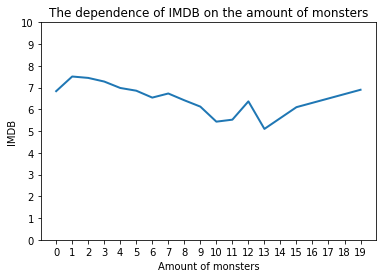

In [107]:
fig, ax = plt.subplots()
ax.plot(li_monster_amount, imdb_monsters_data["imdb"], linewidth=2.0)

ax.set(title="The dependence of IMDB on the amount of monsters",
    xlabel="Amount of monsters",
    ylabel="IMDB",
    xticks=range(0,20,1), 
    yticks=range(0,11,1))

plt.show()

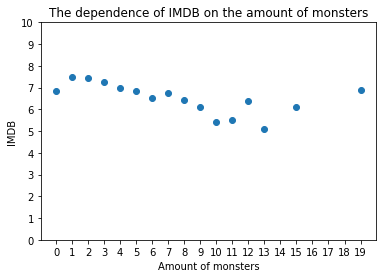

In [108]:
fig, ax = plt.subplots()
ax.scatter(li_monster_amount, imdb_monsters_data["imdb"], linewidth=1.0)

ax.set(title="The dependence of IMDB on the amount of monsters",
    xlabel="Amount of monsters",
    ylabel="IMDB",
    xticks=range(0,20,1), 
    yticks=range(0,11,1))

plt.show()